In [106]:
! pip install geopandas




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [107]:
 ! pip install geodatasets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [108]:
#geoseries
#A GeoSeries is a one-dimensional array-like object that can hold geometries (e.g., points, lines, polygons) and other data types. It is similar to a pandas Series but with support for spatial data.

import geopandas as gpd
from shapely.geometry import Point

# Create a GeoSeries
geometry = [Point(1, 1), Point(2, 2), Point(3, 3)]
geo_series = gpd.GeoSeries(geometry)

print(geo_series)

0    POINT (1 1)
1    POINT (2 2)
2    POINT (3 3)
dtype: geometry


In [109]:
#geodataframe
#A GeoDataFrame is a two-dimensional structure, similar to a pandas DataFrame, but designed for spatial data. 
from shapely.geometry import Point

# Create a list of points (geometries)
geometry = [Point(1, 1), Point(2, 2), Point(3, 3)]

# Create a GeoDataFrame
data = {
    'City': ['A', 'B', 'C'], 
    'Population': [100000, 200000, 150000]
    }
gdf = gpd.GeoDataFrame(data, geometry=geometry)

print(gdf)


  City  Population     geometry
0    A      100000  POINT (1 1)
1    B      200000  POINT (2 2)
2    C      150000  POINT (3 3)


In [110]:
#reading files
import geopandas
from geodatasets import get_path

path_to_data = get_path('nybb')
gdf = geopandas.read_file(path_to_data)
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [111]:
# Read a Shapefile into a GeoDataFrame
#gdf = gpd.read_file('/Users/indirakasichhwa/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
gdf = gpd.read_file('/Users/indirakasichhwa/Downloads/shapefiles_dresden/gis_osm_barriers_07_1.shp')
# Display the first few rows of the GeoDataFrame
print(gdf.head(3))

    osm_id            lastchange  code fclass geomtype                 name  \
0  4232243  2015-05-16T07:52:06Z  5501  fence        W  Grundschule Gompitz   
1  4335057  2017-01-26T10:52:03Z  5501  fence        W                 None   
2  9857776  2016-04-17T15:33:48Z  5521   wall        W        Eliasfriedhof   

                                            geometry  
0  LINESTRING (13.64189 51.0423, 13.64177 51.0419...  
1  LINESTRING (13.72614 51.01767, 13.7243 51.0175...  
2  LINESTRING (13.75564 51.05336, 13.75599 51.052...  


In [112]:
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


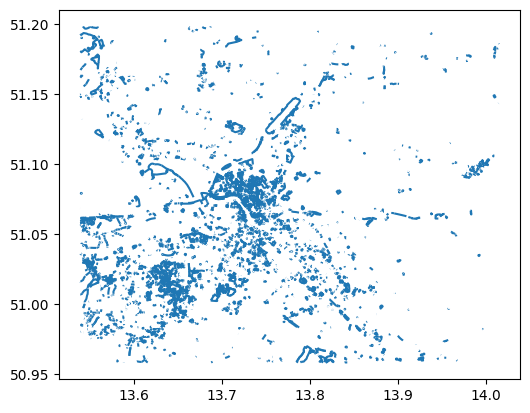

['LineString' 'MultiLineString']
Index(['osm_id', 'lastchange', 'code', 'fclass', 'geomtype', 'name',
       'geometry', 'buffer'],
      dtype='object')


"gdf.plot(column='lastchange', cmap='Blues', legend=True)\nplt.title('City Population')\nplt.show()"

In [124]:
#plotting
import matplotlib.pyplot as plt
# Plot a GeoDataFrame
gdf.plot()

# Show the plot
plt.show()

# Check the geometry type
print(gdf.geometry.type.unique())
print(gdf.columns)

#we can do customization like
'''gdf.plot(column='lastchange', cmap='Blues', legend=True)
plt.title('City Population')
plt.show()'''



In [125]:
#Coordinate Reference Systems (CRS)
# Check the CRS of the GeoDataFrame
print(gdf.crs)

# Transform to a different CRS (for example, EPSG:4326)
#gdf = gdf.to_crs("EPSG:4326")


EPSG:4326


In [127]:
#geospatial operation
#  Buffering
# Create a buffer of 1 unit around each point
gdf['buffer'] = gdf.geometry.buffer(1)
gdf['buffer']

/var/folders/6f/ghzf55qj341cgnxj3gltmh9h0000gn/T/ipykernel_15864/2467523577.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf.geometry.buffer(1)


0        POLYGON ((12.64204 51.03011, 12.6418 51.03425,...
1        MULTIPOLYGON (((13.53089 51.99819, 13.44043 51...
2        POLYGON ((12.75675 51.00628, 12.75674 51.00635...
3        POLYGON ((13.3481 50.07472, 13.25746 50.11407,...
4        MULTIPOLYGON (((12.71853 51.21605, 12.74272 51...
                               ...                        
10596    POLYGON ((13.12268 51.84139, 13.11957 51.84, 1...
10597    POLYGON ((12.74757 50.60359, 12.7282 50.64786,...
10598    MULTIPOLYGON (((12.66195 50.98013, 12.66067 51...
10599    POLYGON ((13.09916 51.74853, 13.17798 51.82225...
10600    POLYGON ((12.95099 51.75909, 12.95362 51.76222...
Name: buffer, Length: 10601, dtype: geometry

In [130]:
#geospatial operation
#  Spatial join
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Define gdf1 (e.g., points data)
gdf1 = gpd.GeoDataFrame({
    'City': ['A', 'B', 'C'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 3)]
}, crs="EPSG:4326")

# Define gdf2 (e.g., polygons data)
gdf2 = gpd.GeoDataFrame({
    'Region': ['Region 1', 'Region 2'],
    'geometry': [Polygon([(0, 0), (0, 2), (2, 2), (2, 0)]), Polygon([(1, 1), (1, 3), (3, 3), (3, 1)])]
}, crs="EPSG:4326")

# Perform the spatial join (joining based on where the points in gdf1 intersect with polygons in gdf2)
gdf_joined = gdf1.sjoin(gdf2, how="inner", predicate="intersects")

# Show the result
print(gdf_joined)


  City     geometry  index_right    Region
0    A  POINT (1 1)            0  Region 1
0    A  POINT (1 1)            1  Region 2
1    B  POINT (2 2)            0  Region 1
1    B  POINT (2 2)            1  Region 2
2    C  POINT (3 3)            1  Region 2


In [132]:
#geospatial operation
#  Intersection
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Define gdf1 (e.g., points data)
gdf1 = gpd.GeoDataFrame({
    'City': ['A', 'B', 'C'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 3)]
}, crs="EPSG:4326")

# Define gdf2 (e.g., polygons data)
gdf2 = gpd.GeoDataFrame({
    'Region': ['Region 1', 'Region 2'],
    'geometry': [Polygon([(0, 0), (0, 2), (2, 2), (2, 0)]), Polygon([(1, 1), (1, 3), (3, 3), (3, 1)])]
}, crs="EPSG:4326")

# Perform intersection based on where the points in gdf1 intersect with polygons in gdf2
intersection = []
for _, point in gdf1.iterrows():
    # Check for each polygon in gdf2 if it intersects with the point
    for _, polygon in gdf2.iterrows():
        if point['geometry'].intersects(polygon['geometry']):
            intersection.append(point['geometry'].intersection(polygon['geometry']))

# Show the result
print(intersection)


[<POINT (1 1)>, <POINT (1 1)>, <POINT (2 2)>, <POINT (2 2)>, <POINT (3 3)>]


In [134]:
#geospatial operation
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Define gdf1 (e.g., points data)
gdf1 = gpd.GeoDataFrame({
    'City': ['A', 'B', 'C'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 3)]
}, crs="EPSG:4326")

# Define gdf2 (e.g., polygons data)
gdf2 = gpd.GeoDataFrame({
    'Region': ['Region 1', 'Region 2'],
    'geometry': [Polygon([(0, 0), (0, 2), (2, 2), (2, 0)]), Polygon([(1, 1), (1, 3), (3, 3), (3, 1)])]
}, crs="EPSG:4326")

# Calculate the distance between points in gdf1 and polygons in gdf2
distance = []
for _, point in gdf1.iterrows():
    for _, polygon in gdf2.iterrows():
        # Calculate distance from point to polygon
        dist = point['geometry'].distance(polygon['geometry'])
        distance.append(dist)

# Show the distances
print(distance)


[0.0, 0.0, 0.0, 0.0, 1.4142135623730951, 0.0]


In [139]:
#Measuring area
gdf = gpd.read_file('/Users/indirakasichhwa/Downloads/shapefiles_dresden/gis_osm_barriers_07_1.shp')
gdf["boundary"] = gdf.boundary
gdf["boundary"]

0                                         MULTIPOINT EMPTY
1                                         MULTIPOINT EMPTY
2                                         MULTIPOINT EMPTY
3                                         MULTIPOINT EMPTY
4                                         MULTIPOINT EMPTY
                               ...                        
10596    MULTIPOINT (13.66314 51.00059, 13.66219 51.00003)
10597    MULTIPOINT (13.66292 51.00324, 13.66439 51.00275)
10598                                     MULTIPOINT EMPTY
10599    MULTIPOINT (13.82063 51.05608, 13.82089 51.05613)
10600    MULTIPOINT (13.68692 51.08232, 13.68417 51.08048)
Name: boundary, Length: 10601, dtype: geometry

In [89]:
#Getting polygon boundary
gdf["area"] = gdf.area
gdf["area"]

/var/folders/6f/ghzf55qj341cgnxj3gltmh9h0000gn/T/ipykernel_15864/2969711843.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10596    0.0
10597    0.0
10598    0.0
10599    0.0
10600    0.0
Name: area, Length: 10601, dtype: float64

In [90]:
#Getting polygon centroid
gdf["centroid"] = gdf.centroid
gdf["centroid"]

/var/folders/6f/ghzf55qj341cgnxj3gltmh9h0000gn/T/ipykernel_15864/2037808771.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


0        POINT (13.64236 51.04202)
1        POINT (13.72518 51.01777)
2        POINT (13.75691 51.05329)
3        POINT (13.70139 51.01092)
4        POINT (13.69807 51.01212)
                   ...            
10596     POINT (13.66267 51.0003)
10597    POINT (13.66403 51.00328)
10598    POINT (13.66073 51.00583)
10599    POINT (13.82075 51.05612)
10600    POINT (13.68605 51.08087)
Name: centroid, Length: 10601, dtype: geometry

In [93]:

#Measuring distance
#We can also measure how far each centroid is from the first centroid location.
first_point = gdf["centroid"].iloc[0]
gdf["distance"] = gdf["centroid"].distance(first_point)
gdf["distance"]

/var/folders/6f/ghzf55qj341cgnxj3gltmh9h0000gn/T/ipykernel_15864/4185282143.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance"] = gdf["centroid"].distance(first_point)


0        0.000000
1        0.086296
2        0.115108
3        0.066726
4        0.063235
           ...   
10596    0.046410
10597    0.044392
10598    0.040593
10599    0.178952
10600    0.058461
Name: distance, Length: 10601, dtype: float64

In [95]:
#calculate the average of the distances measured above, access the ‘distance’ column and call the mean() method on it:
gdf["distance"].mean()


np.float64(0.09570480962397533)

<Axes: >

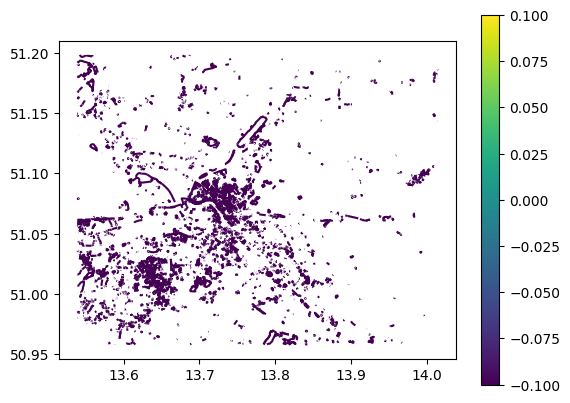

In [97]:
#Making maps

gdf.plot("area", legend=True)

In [101]:
! pip install matplotlib
!  pip install folium
! pip install mapclassify


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 28.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 31.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [102]:
gdf.explore("area", legend=False)

<Axes: >

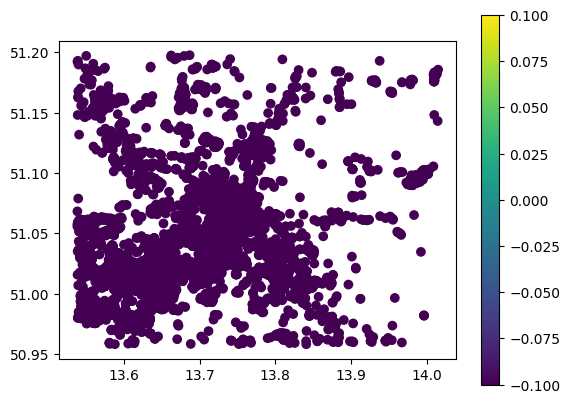

In [103]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

<Axes: >

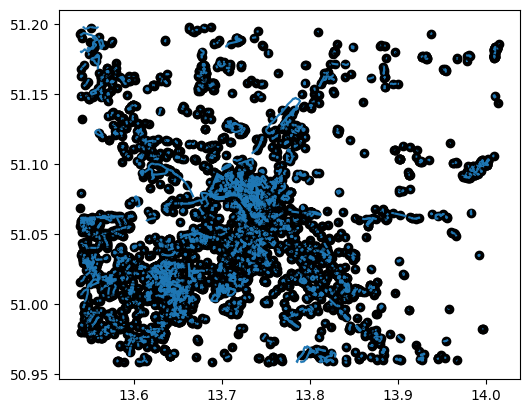

In [104]:
#we can also layer both GeoSeries on top of each other. We just need to use one plot as an axis for the other.
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")


In [105]:
#set the active geometry back to the original GeoSeries.
gdf = gdf.set_geometry("geometry")
